In [13]:
import pandas

# 데이터 불러오고 header는 없게 설정
df = pandas.read_csv('auto-mpg.csv',header=None)

# 컬럼명 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [14]:
df.shape # 간단하게 데이터프레임의 모양과 크기를 알 수 있음

(398, 9)

In [17]:
df.info() # 데이터프레임의 내용 확인 (데이터의 자료형 및 결측치 확인 가능)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [21]:
df.dtypes # 데이터 타입만 출력

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

In [25]:
df.describe(include='all') # 데이터의 기술 통계 정보 요약

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [27]:
df.count() # 각 열의 데이터 개수

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
name            398
dtype: int64

In [30]:
df['origin'].value_counts() # 각 열의 고유값 개수

1    249
3     79
2     70
Name: origin, dtype: int64

In [42]:
df['mpg'].mean() # 특정 열의 평균 출력하기
df.mean() # 모든 열의 평균 출력
df[['mpg','cylinders']].mean() # 2개 이상 열의 평균 출력하기 

mpg          23.514573
cylinders     5.454774
dtype: float64

In [36]:
df['mpg'].median() # 특정 열의 중간값 출력하기

23.0

In [38]:
df['mpg'].max() # 특정 열의 최대값 출력하기

46.6

In [39]:
df['mpg'].min() # 특정 열의 최소값 출력하기

9.0

In [46]:
pandas.DataFrame({'max':df.max(), 'min':df.min()}) # max랑 min값만 뽑아서 데이터프레임 만들기

,max,min
mpg,46.6,9
cylinders,8,3
displacement,455,68
horsepower,?,100.0
weight,5140,1613
acceleration,24.8,8
model year,82,70
origin,3,1
name,vw rabbit custom,amc ambassador brougham


In [49]:
df.std() # 표쥰편차 출력
df['mpg'].std() # 특정 열 표준편차 출력

7.815984312565782

<AxesSubplot:xlabel='weight', ylabel='mpg'>

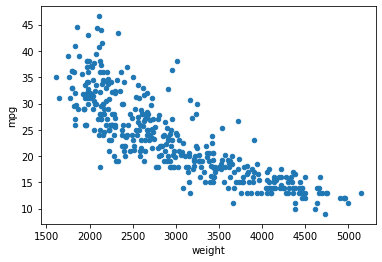

In [60]:
# 두가지 변수를 산점도로 나타내기(추세파악: 음의관계)
df[['weight','mpg']].plot(x = 'weight', y = 'mpg', kind =  'scatter') 

In [57]:
df.corr() # 상관관계 파악, 변수간 일대일로 상관계수를 보여줌

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000
